<h1 style = "text-decoration: underline; font-weight: bold;">Introduction</h1>
<br>

In this notebook, I use 214 different of samples of glass, which include, the <a style = "font-style: italic;">refractive index</a> and the <a style = "font-style: italic;">chemical composition</a> made up of:
<pre>
• Sodium              • Magnesium
• Aluminium           • Silicon
• Potassium           • Calcium
• Barium              • Iron
</pre>
<br>
The main objective of the algorithm is to accurately predict the type of glass from a sample which is linked to a crime and can therefore provide foresic evidence.

The dataset is labeled using the periodic table symbol for each element and Ri for the refractive Index. In addition, the dataset includes "Target" which is the glass type that the data corresponds to. This is important so we have a baseline of what an expected composition of each glass type is so we can build an accurate model off it.

Glass left at crime scenes are often the most common and important pieces of foresic evidence submitted [1]. Unlike other pieces of forensic evidence, such as biological or fingerprints, glass does not degrade over time and can link a suspect to a crime scene. 
Different methods of production and different compositions of glass cause variations in the physical and chemical properties of the glass. 
'These small fragments can be transferred to the clothing, hair or footwear of anyone in the vicinity of the glass as it breaks' [1], Therefore making glass, important and useful evidence in foresic investigations.
<br>

<h2 style = "font-size: 20px; text-decoration: underline;">Data preprocessing:</h2>
The data preprocessing done for this sample was the formatting of the raw data to a csv file that can be used in this notebook, In addition, I added the Labels for the data to the top of the CSV so we can identify what each datum references.

<br>
<br>

<h1 style = "text-decoration: underline; font-weight: bold;">Importing Libraries</h1>
<br>
We will start by importing numpy, pandas, matplot, seaborn and Sklearn.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Now, we will declare variables and constants that will be used often throughout the entire notebook.

In [23]:
#Loading the provided data into a variable called data_frame:
data_frame = pd.read_csv('glass.csv')

feature_frame = data_frame.iloc[:,0:-1]
label_frame = data_frame[['Target']]

<h1 style = "text-decoration: underline; font-weight: bold;">Exploratory Analysis</h1>
<br>
Before building the model, I am going to explore the provide data to get a better understanding of what each datapoint is representing and seeing any early patterns that may exist.

<br>

The glass types we have are:
<pre>
1 - Building Windows Float Proccessed
2 - Building Windows Non-Float Proccessed
3 - Vehicle Windows Float Processed
4 - Vehicle Windows Non-Float Processed
5 - Containers
6 - Tableware
7 - Headlamps
</pre>

In [42]:
data_frame.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Text(0, 0.5, '')

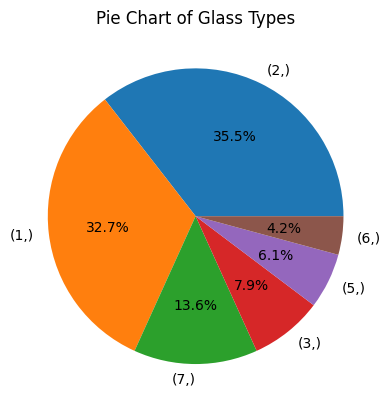

In [24]:
label_frame.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Glass Types')
plt.ylabel('')

The pie chart above shows how the dataset is made up. It indicates that around 1/3 of the data is made up of glass type 2, Building Windows Non-Float Processed, whilst another 1/3 is made of glass type 1, Building Windows Float Processed. This means that the most reliable prediction will be made on these 2 glass types as we have a higher number of samples. Type 6 only makes up 4.2% of our sample size, therefore may have the least accurate predictions.

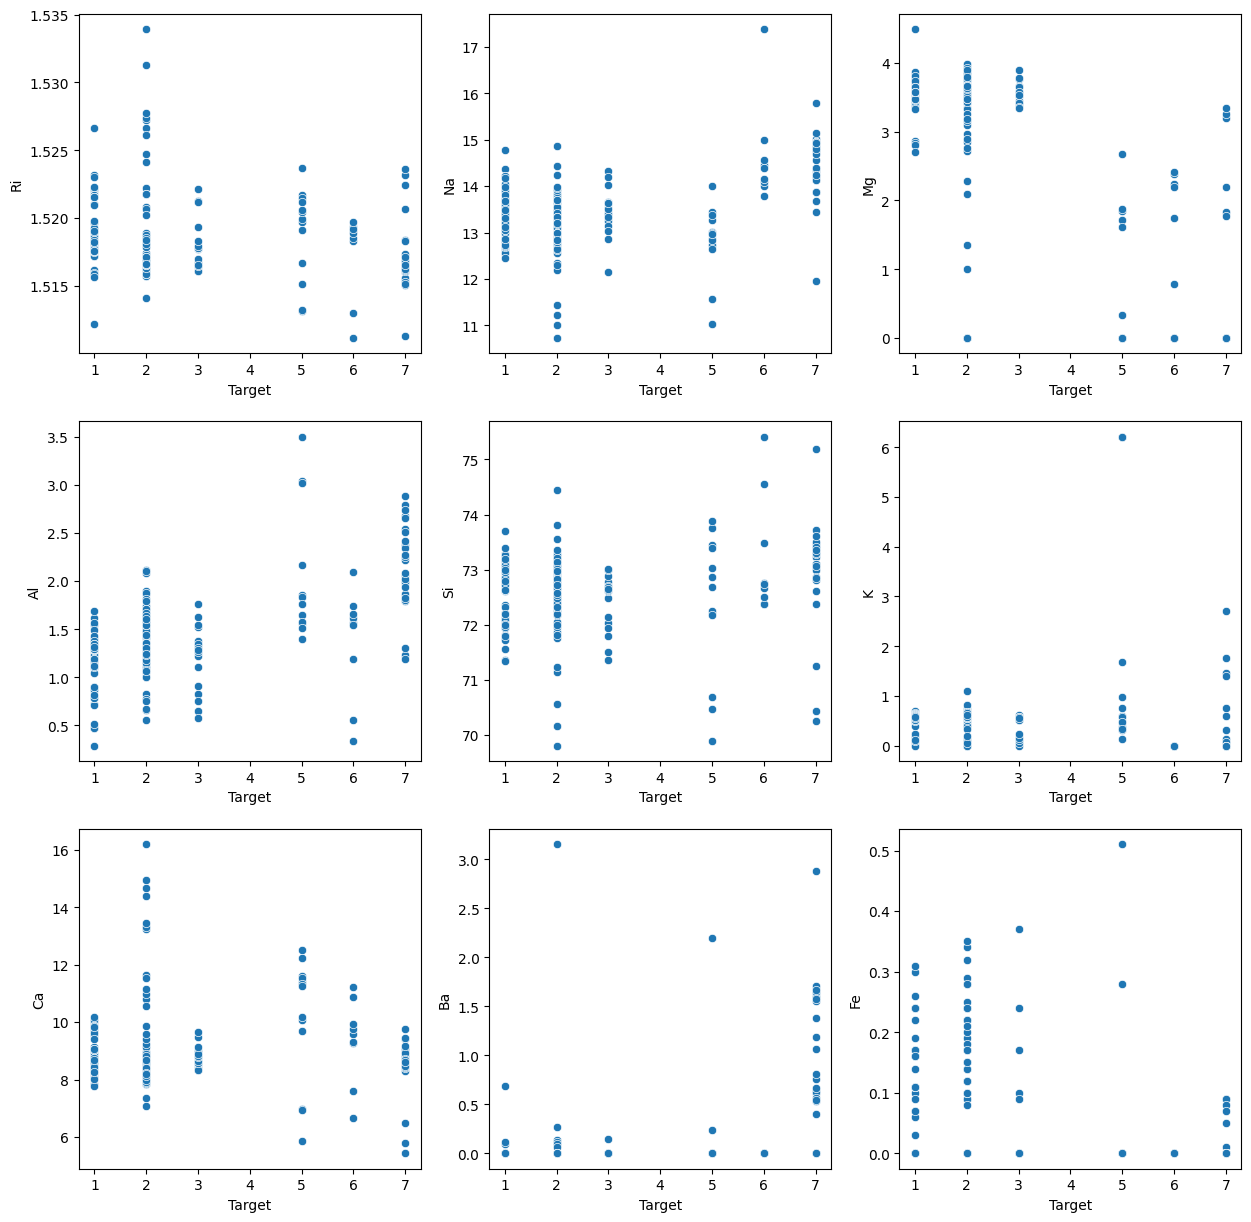

In [25]:
fig, axs = plt.subplots(3, 3,figsize=(15, 15))
plt.subplot(3,3,1)
sns.scatterplot(x="Target", y="Ri", data=data_frame)
plt.subplot(3,3,2)
sns.scatterplot(x="Target", y="Na", data=data_frame)
plt.subplot(3,3,3)
sns.scatterplot(x="Target", y="Mg", data=data_frame)
plt.subplot(3,3,4)
sns.scatterplot(x="Target", y="Al", data=data_frame)
plt.subplot(3,3,5)
sns.scatterplot(x="Target", y="Si", data=data_frame)
plt.subplot(3,3,6)
sns.scatterplot(x="Target", y="K", data=data_frame)
plt.subplot(3,3,7)
sns.scatterplot(x="Target", y="Ca", data=data_frame)
plt.subplot(3,3,8)
sns.scatterplot(x="Target", y="Ba", data=data_frame)
plt.subplot(3,3,9)
sns.scatterplot(x="Target", y="Fe", data=data_frame)

plt.show()

The scatterplots show that Target 4, Vehicle Windows Non-Float Processed, has no samples present in the dataset. It may be possible to make a prediction about Target 4 from this dataset by looking at which elemental composition pattern is not 'used' by the other glass types, however this makes assumptions that there are no more than the 7 glass types and that the composition of glass type 4 is different to the other 6 types.

The Scatterplots above give a good understanding of each type composition. For example, it shows that Type 1 generally has Ca in the range of 8 - 10. It also shows outliers, such as target 5, which has iron and the top, middle and bottom of the range, therefore may suggest that Iron composition in type 5 is unpredictable and cannot be used as an accurate measurement for glass type alone, however only 3 samples of the samples actually contained iron.
<Br>

Next, I will pick one sample to further look into, Type 2 has the largest number of samples and will therefore produce the best results so I will use this one.

In [26]:
type2_data = data_frame[data_frame['Target'] == 2]

print(type2_data)

type2_data.describe().mean()

          Ri     Na    Mg    Al     Si     K    Ca    Ba    Fe  Target
70   1.51574  14.86  3.67  1.74  71.87  0.16  7.36  0.00  0.12       2
71   1.51848  13.64  3.87  1.27  71.96  0.54  8.32  0.00  0.32       2
72   1.51593  13.09  3.59  1.52  73.10  0.67  7.83  0.00  0.00       2
73   1.51631  13.34  3.57  1.57  72.87  0.61  7.89  0.00  0.00       2
74   1.51596  13.02  3.56  1.54  73.11  0.72  7.90  0.00  0.00       2
..       ...    ...   ...   ...    ...   ...   ...   ...   ...     ...
141  1.51851  13.20  3.63  1.07  72.83  0.57  8.41  0.09  0.17       2
142  1.51662  12.85  3.51  1.44  73.01  0.68  8.23  0.06  0.25       2
143  1.51709  13.00  3.47  1.79  72.72  0.66  8.18  0.00  0.00       2
144  1.51660  12.99  3.18  1.23  72.97  0.58  8.81  0.00  0.24       2
145  1.51839  12.85  3.67  1.24  72.57  0.62  8.68  0.00  0.35       2

[76 rows x 10 columns]


Ri        10.640301
Na        19.354796
Mg        11.799721
Al        10.585500
Si        63.963762
K          9.943097
Ca        16.936602
Ba         9.945325
Fe         9.586396
Target    11.000000
dtype: float64

Firstly, I printed the entire table of data for type 2. This shows the composition of each sample, and that there are 76 samples for type 2 in total. 
Secondly, I printed the mean of each element for the type of glass. This produced the average composition and gives you an understanding on what the glass is made out of.

This can be done for each type of glass now to see if there are any patterns or similarities/differences.

This shows that for Type 2, the element in the highest concentration is Silicon, we can use this information to help predict the type of other glass samples, depending on which element it has the most of.

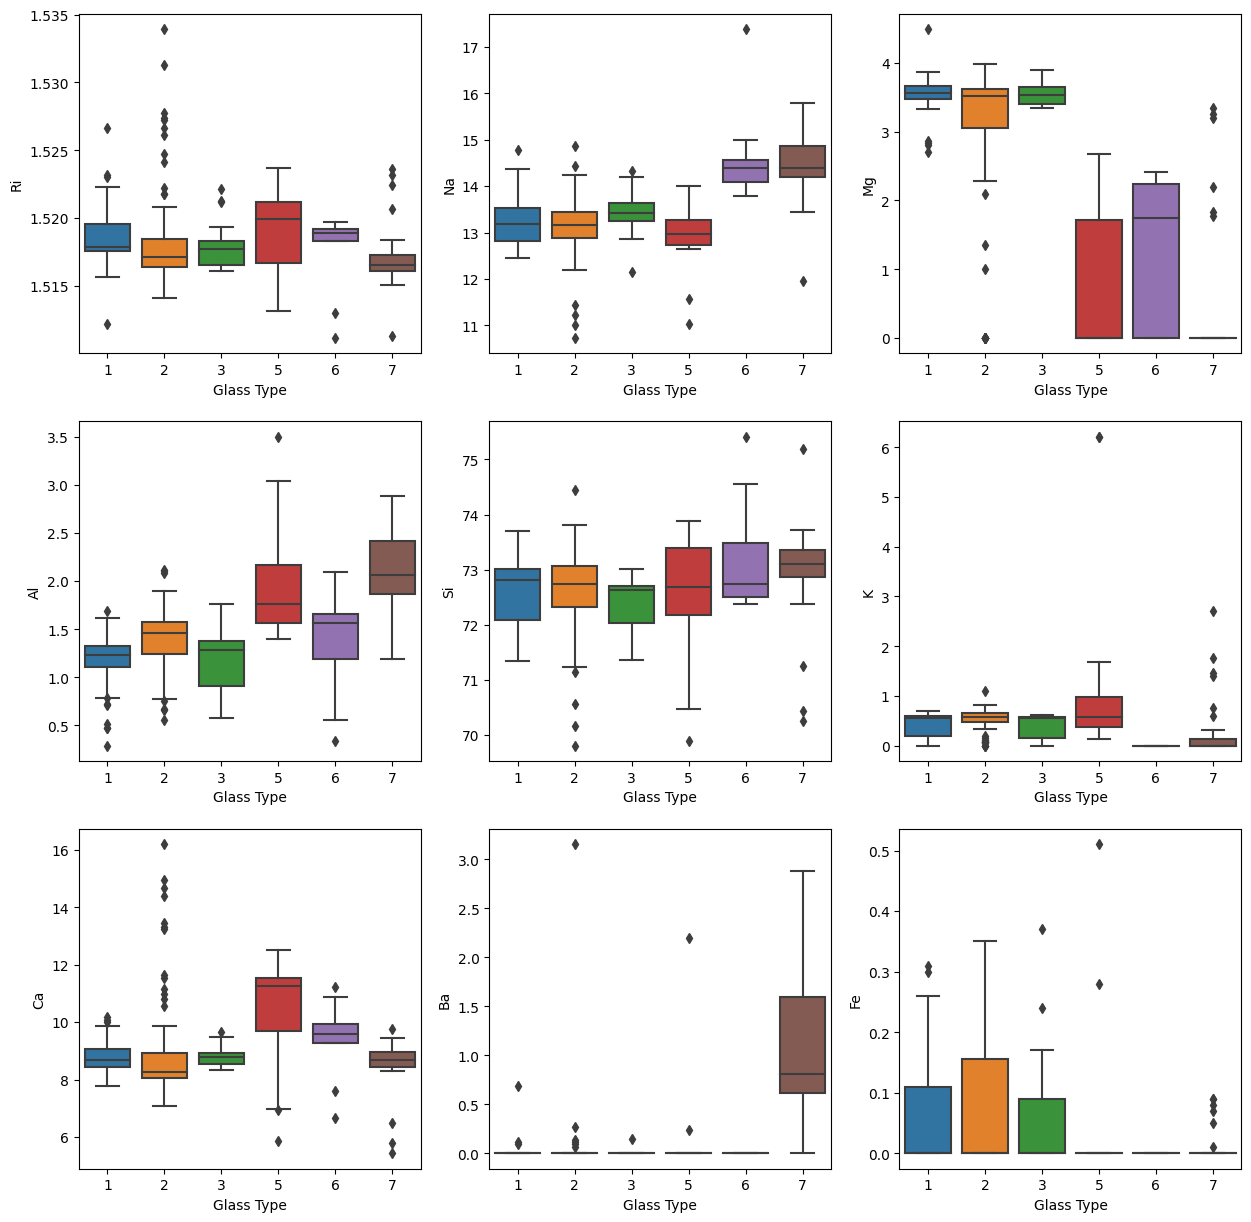

In [27]:

fig, axs = plt.subplots(3, 3 ,figsize=(15, 15))
plt.subplot(3,3,1)
sns.boxplot(x='Target', y='Ri', data=data_frame)
plt.xlabel('Glass Type')
plt.ylabel('Ri')

plt.subplot(3,3,2)
sns.boxplot(x='Target', y='Na', data=data_frame)
plt.xlabel('Glass Type')
plt.ylabel('Na')

plt.subplot(3,3,3)
sns.boxplot(x='Target', y='Mg', data=data_frame)
plt.xlabel('Glass Type')
plt.ylabel('Mg')

plt.subplot(3,3,4)
sns.boxplot(x='Target', y='Al', data=data_frame)
plt.xlabel('Glass Type')
plt.ylabel('Al')

plt.subplot(3,3,5)
sns.boxplot(x='Target', y='Si', data=data_frame)
plt.xlabel('Glass Type')
plt.ylabel('Si')

plt.subplot(3,3,6)
sns.boxplot(x='Target', y='K', data=data_frame, labels=None)
plt.xlabel('Glass Type')
plt.ylabel('K')

plt.subplot(3,3,7)
sns.boxplot(x='Target', y='Ca', data=data_frame)
plt.xlabel('Glass Type')
plt.ylabel('Ca')

plt.subplot(3,3,8)
sns.boxplot(x='Target', y='Ba', data=data_frame)
plt.xlabel('Glass Type')
plt.ylabel('Ba')

plt.subplot(3,3,9)
sns.boxplot(x='Target', y='Fe', data=data_frame)
plt.xlabel('Glass Type')
plt.ylabel('Fe')

plt.show()


The boxplots above show the composition makeup for each of the elements and glass types. 

This shows some interesting findings. For example, Glass Type 6 has a large range for magnesium, with no outliers, whereas type 7 for has almost no magnesium, except for the multiple outliers where the concentration is quite high. It also shows that type 7 is the only glass that consisently has Barium present in it, important information that can make predicting glass easier later.

Glass type 2 has a high number of outliers for both Calcium and the Refractive Index, This may mean the samples taken are either contaminated or using Calcium to predict glass type 2 is unreliable.

Overall, the boxplots provide a useful visual tool for exploring the distribution of the glass composition data for each element and glass type. They have revealed some interesting patterns and anomalies, which could be further investigated and used to inform the modeling stage of the data science pipeline.

<br>
<h2 style = "font-size: 20px; text-decoration: underline;">Outlier Detection:</h2>

By using the data from the boxplots, we can detect outliers in the dataset using the Inter Quartile Range and therefore make the model more accurate in the future.

Text(0, 0.5, 'Ri')

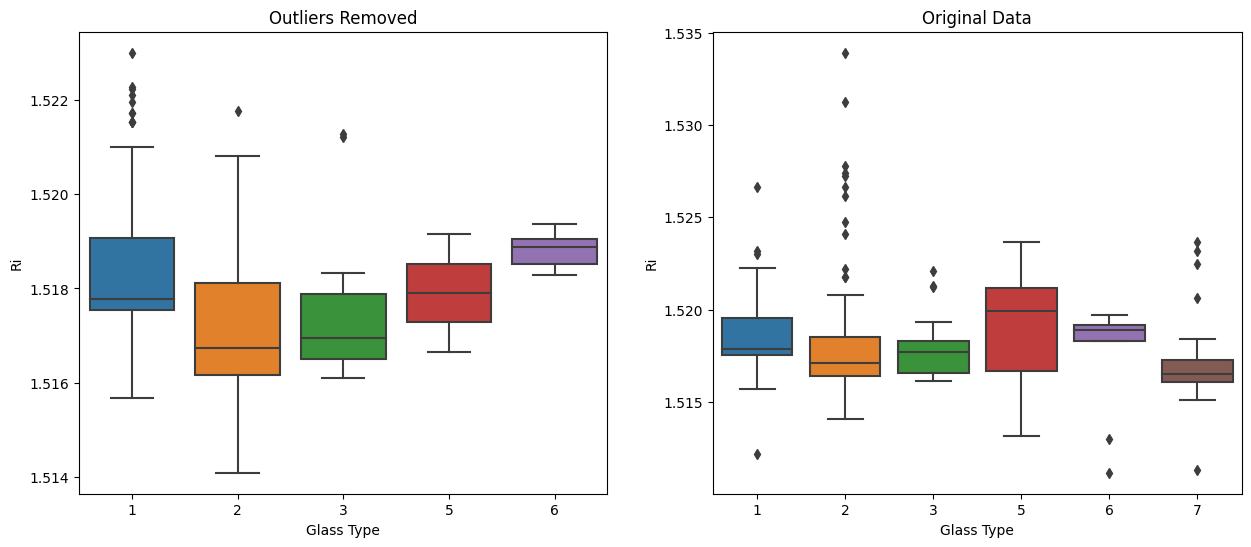

In [28]:
# Calculate the IQR
q1, q3 = np.percentile(data_frame, [25, 75])
iqr = q3 - q1

# calculate the IQR for each column
Q1 = data_frame.quantile(0.25)
Q3 = data_frame.quantile(0.75)
IQR = Q3 - Q1

# identify the outliers and remove them
outliers = ((data_frame < (Q1 - 1.5 * IQR)) | (data_frame > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_removed = data_frame[~outliers]

# Create a boxplot without outliers

fig, axs = plt.subplots(1, 2 ,figsize=(15, 6))
plt.subplot(1,2,1)
sns.boxplot(x='Target', y='Ri', data=outliers_removed)
plt.title("Outliers Removed")
plt.xlabel('Glass Type')
plt.ylabel('Ri')
plt.subplot(1,2,2)
sns.boxplot(x='Target', y='Ri', data=data_frame)
plt.title("Original Data")
plt.xlabel('Glass Type')
plt.ylabel('Ri')

The boxplots above show the Refractive Index with the outliers removed on the left and the original data on the right. An interesting observation is that the Ri for type 7 is 0, This may mean that the data we have on type 7's refractive index may have a large range, and no pattern to it, therefore meaning it is unreliable and not something that can be used to predict glass types.

<h1 style="text-decoration:underline;font-weight:bold;">Modelling:</h1>

To create a model for the dataset, I have decided to use a Decision Tree Classifier.

A Decision Tree Classifier will provide an easy to interpret tree showing the results from the data. 

In order to create the model, I first split the dataset into a testing and training set. 80% of which was for training, 20% was for testing.

In [29]:
data_train, data_test, label_train, label_test = train_test_split(data_frame, label_frame, test_size=0.2, random_state=0)

Now that the data is split, The Decision Tree Classifier can be trained using the training set. To do this, we need to fit the model to the training data.

In [30]:
classifier = DecisionTreeClassifier()

classifier.fit(data_train.values, label_train)


DecisionTreeClassifier()

Now that the model has been created, we can feed it the test data set and create a prediction based on it.

In [31]:
prediction = classifier.predict(data_test.values)

DTC_correct = 0;
DTC_incorrect = 0;

for index, row in data_test.iterrows():
    individual_prediction = classifier.predict([row])
    equal = False
    if individual_prediction == label_test.loc[index].values:
        equal = True
        DTC_correct += 1
    else:
        DTC_incorrect += 1
    print("Prediction: ", individual_prediction , " -  Actual: ", label_test.loc[index].values, " -  Correct?:", equal)

accuracy = classifier.score(data_test.values, prediction)
print("Accuracy: ", accuracy)

Prediction:  [7]  -  Actual:  [7]  -  Correct?: True
Prediction:  [1]  -  Actual:  [1]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [6]  -  Actual:  [6]  -  Correct?: True
Prediction:  [5]  -  Actual:  [5]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [1]  -  Actual:  [1]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [1]  -  Actual:  [1]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [3]  -  Actual:  [3]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [7]  -  Actual:  [7]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [1]  -  Actual:  [1]  -  Correct?: True
Prediction:  [3]  -  Actual:  [3]  -  Correct?

In [32]:
confusion_matrix(label_test, prediction)

array([[ 9,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

After running the model, The predictions are correct as shown above in the confusion matrix. By comparing the result from the prediction and the actual glass type from the dataset, we can see that the predictions are correct. This shows that predicting glass types can be done accurately, and suggests that each glass type has a distingtive elemental composition and Refraction Index.

In addition to the Decision Tree Classifier, I will use a K-Near Neighbour Classifier. KNN is a good model to use in this situation as it is robust to noisy data. This means it can work around data that has outliers or inaccurate samples, and as outlier removal has not been performed on this data, there may be outliers that would effect other models. In addition, KNN models are tunable, meaning its accuracy can be increased/decresed depending on a number of variables, such as the K number, allowing the model to be tailored better to any dataset.

The first step in creating a KNN model is finding a K number, and fitting the dataset to the model.

Once that is done, predictions can be made using the test data, and depending on the accuracy, the K number can be modified to increase prediction success.

In the model below, The K number 5 produced the most accurate results, however small changes to this number did little to the overall accuracy or did not change it at all.

In [33]:
k = 5

knn_correct = 0;
knn_incorrect = 0;

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data_train.values, label_train)

knn_pred = knn.predict(data_test.values)

for index, row in data_test.iterrows():
    individual_prediction = knn.predict([row])
    equal = False
    if individual_prediction == label_test.loc[index].values:
        equal = True
        knn_correct += 1;
    else:
        knn_incorrect += 1;
    print("Prediction: ", individual_prediction , " -  Actual: ", label_test.loc[index].values, " -  Correct?:", equal)

accuracy = accuracy_score(label_test, knn_pred)
print('Accuracy:', accuracy)


Prediction:  [7]  -  Actual:  [7]  -  Correct?: True
Prediction:  [1]  -  Actual:  [1]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [6]  -  Actual:  [6]  -  Correct?: True
Prediction:  [5]  -  Actual:  [5]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [1]  -  Actual:  [1]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [1]  -  Actual:  [1]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [3]  -  Actual:  [3]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [7]  -  Actual:  [7]  -  Correct?: True
Prediction:  [2]  -  Actual:  [2]  -  Correct?: True
Prediction:  [1]  -  Actual:  [1]  -  Correct?: True
Prediction:  [3]  -  Actual:  [3]  -  Correct?

c:\Users\alfie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
confusion_matrix(label_test, knn_pred)

array([[ 9,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

The KNN model had an overall accuracy of 97%. As we can see from the confusion matrix above, The model correctly predicted all but one of the glass types. Incorrectly predicting one sample as Type 7, despite it being type 6. This suggests that glass type 6 and 7 have similar chemical composition, or due to an anomoly in the dataset that resulted in less accurate data for type 7, and therefore the incorrect prediciton.

Only predicting one sample incorrectly may seem like an excellent model, however with our relatively small dataset, it equates to 97% accuracy, and if scaled over a larger dataset, the samples predicted incorrectly will also scale with it, which may result in hundreds of incorrect samples if the dataset is large enough.

By using 2 models, the results from both can be compared to improve accuracy. For example, with our dataset, the KNN model predicted one sample incorrectly. This same sample was predicted correctly by the Decision Tree Classifier, therefore we can say we have an accurate prediction for that sample, however, this still may not be entirely accurate, and a third model could be used to increase this even further. In addition, by comparing the two models, we can see if the prediction for each sample is correct, as if both models predicited the same thing, then we can confidently say that the models are accurate and the preditctions are correct, if we dont have access to the actual data results for each sample type, which we would not in the real world as samples would come in without us knowing the glass type before hand.

<h1 style="text-decoration:underline;font-weight:bold;">Results:</h1>
<br>
Now that we have created both models and have the prediction results, we can investigate further and better display our findings. I want to make comparisions against the 2 models, as well as the sample predictions and the actual sample data.

To start with, I will pick glass type 6 and 7 to compare, as these glass types were incorectly predicted by the KNN model. This therefore suggests that those glass types are similar in their composition or, one sample in the dataset had inacurate data resulting in the incorrect prediction by the model.



Text(0, 0.5, 'Al')

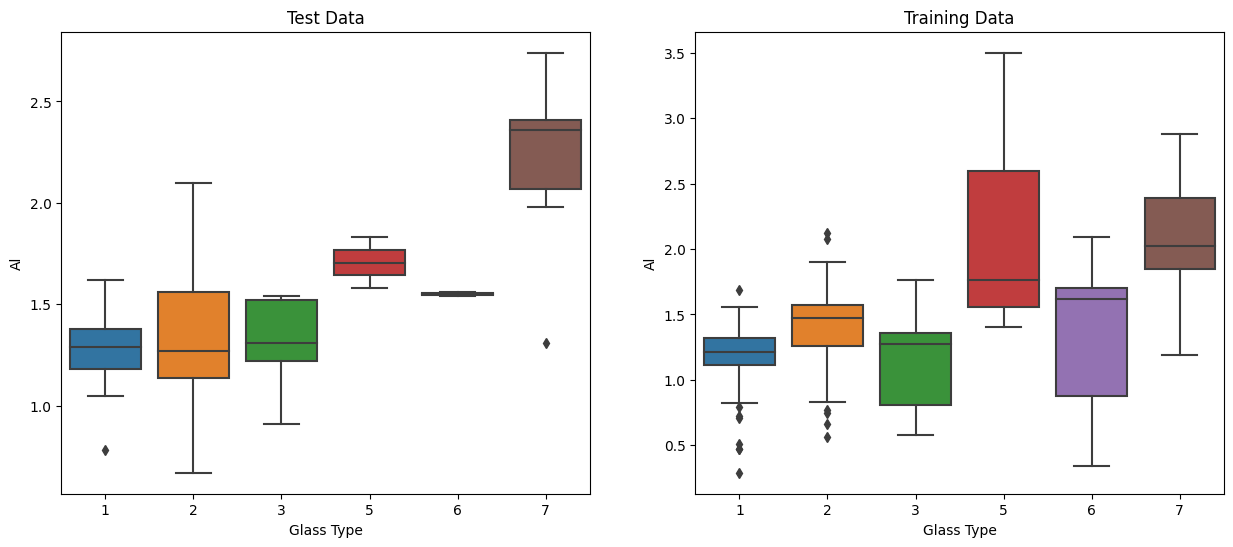

In [35]:
fig, axs = plt.subplots(1, 2 ,figsize=(15, 6))
plt.subplot(1,2,1)
sns.boxplot(x='Target', y='Al', data=data_test)
plt.title("Test Data")
plt.xlabel('Glass Type')
plt.ylabel('Al')
plt.subplot(1,2,2)
sns.boxplot(x='Target', y='Al', data=data_train)
plt.title("Training Data")
plt.xlabel('Glass Type')
plt.ylabel('Al')

Looking at the comparision between the test and training data for the aluminium composition, We can see that the test data has significantly less type 6 glass samples, there is also an outlier in type 7, which could have contributed to the incorrect prediciton. The only other glass type to have an outlier in the test data was type 1, however due to the larger samples present in the dataset, this outlier was factored for in the KNN model, resulting in the correct predictions. 

It is also worth noting that type 5 in the test data had a much narrower range, This meant that the samples in the test data were quite similar to each other, so the model had a good basis for that glass type to go of, and once it predicted one correctly, it was more likely to correctly predict the others than not.

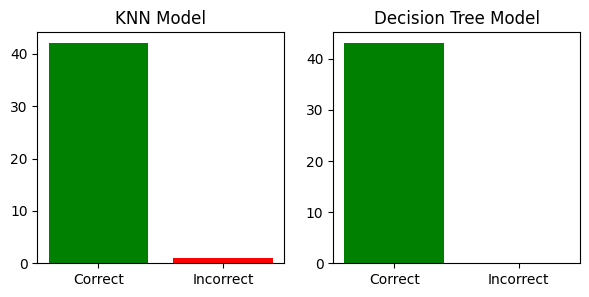

In [36]:
fig, axs = plt.subplots(1, 2 ,figsize=(7, 3))
plt.subplot(1,2,1)
plt.title("KNN Model")
plt.bar(x=[0], height=[knn_correct], color='green')
plt.bar(x = [1], height=[knn_incorrect], color='red')
plt.xticks([0,1], ['Correct', 'Incorrect'])
plt.subplot(1,2,2)
plt.title("Decision Tree Model")
plt.bar(x=[0], height=[DTC_correct], color='green')
plt.bar(x = [1], height=[DTC_incorrect], color='red')
plt.xticks([0,1], ['Correct', 'Incorrect'])

plt.show()

The graph above visually represents the results of the 2 models. For this dataset we can see that the KNN model got 1 prediction incorrect, whilst the Decision Tree Model was correct 100% of the time.

The 97% accuracy of the KNN model can be scaled to estimate how many incorrect prediction would be made if we had a larger dataset, for example, if we had 10x more samples, at 440, 10 of these predictions would be incorrect, If the dataset was large enough, the incorrect predicitions could effect overall results and whatever the person wants to do with the data, such as prediciting crime. If a sample was one that was incorrectly predicted, the investigation could be thrown off course and result in either someone wrongly convicted, or someone innocent convicted of the crime. Therefore ensuring the highest accuracy, or some sort of 2nd check, in this case done by using 2 models and comparing results, is important to ensure the models are ethical.

The graph below shows the incorrect predicitions increasing exponetially as the sample size also increases 10 times per bar.
It's clear that despite 97% accuracy appearing high, it can easily get out of hand and significantly effect results.

Text(0.5, 0, 'Sample Size')

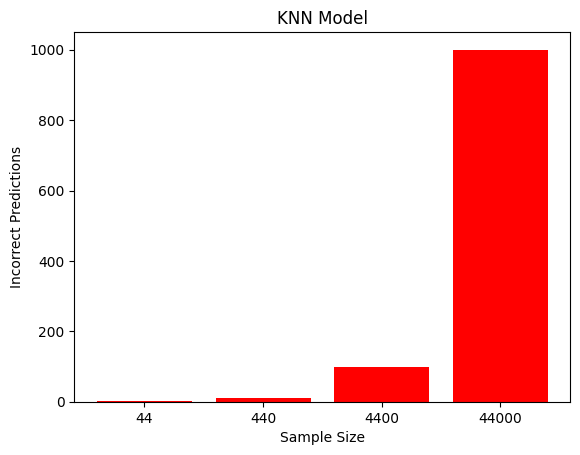

In [37]:
plt.title("KNN Model")
plt.bar(x=[0], height=1, color='red')
plt.bar(x = [1], height=10, color='red')
plt.bar(x = [2], height=100, color='red')
plt.bar(x = [3], height=1000, color='red')
plt.xticks([0,1,2,3], ['44', '440', '4400', '44000'])
plt.ylabel("Incorrect Predictions")
plt.xlabel("Sample Size")

<h1 style="text-decoration:underline;font-weight:bold;">Conclusion:</h1>
<br>

In conclusion, The dataset of glass type can be accurately predicted from the refractive index and elemental composition. With more training, and a larger dataset, this can be made more accurate. The use of 2 or more models is important however to ensure as accurate predictions as possible.

The models could have been made more accurate, especially the Decision Tree Classifier, by removing any outliers from the sample dataset, the KNN model is able to work around outliers better and therefore is the more accurate model to use alone and if no data preprocessing has occured. In addition by using a larger dataset of samples, the models can be made more accurate as they will have more data to train on, as well as, more samples which may either be borderline on their sample type, or either complete anomolies which would result in an incorrect prediction. An accuracy of 100% is quite unlikely, therefore due to the smaller sample size, the samples may be easily predictible and not have much overlap with other glass types, hence the high accuracy. It is also possible that the small dataset does not have many or any outliers/anomilies that need to be accounted for by the model, therefore creating an excellent training dataset for the model to use, or that the only anomolies were placed in the testing dataset and not the training dataset.
